<a href="https://colab.research.google.com/github/Christianah001/Hackbio-biocoding-internship/blob/main/stage3_HB_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REPORT CANCER PROJECT

The task was tackled in the following steps

Step 1 : Loading and inspecting dataset

The url for the dataset was stored in a variable 'url'. Pandas was used to read the csv file in the url.

The first five rows was printed as well as summary of data information including column and row number, column names, data types, and missing values

Step 2 : Preparing data for machine learning

We separated features and target variables by extracting and droping the "diagnosis" column and keeping only the independent variables. This is to cluster without labels.

We checked if there were non-numeric columns and if present 'OneHotEncoder' was used to convert catergorical variables into binary columns.

We used z-score normalization to standardize data to have zero mean and unit variance.

Step 3: PCA (principal component analysis) and K-Means clustering
We applied PCA to reduce dimensionality of the data and performed K-Means clustering with k=2 assuming that a cluster is malignant and the other is benign

Step 4: Visualizing and evaluating cluster quality with Elbow method
We plot clusters using the two principal components and computed silhouette scores. We tried k=2 to k=5, comparing each silhouette score to find the best k value using the elbow method. k=2 shows a silhouette score of 0.5 which is closest to 1 compared to the others, indicating that it is the best k value. Although the elbow plot indicates that there are k=3 is the best k value.

Step 5: Finding Subclasses
We created a dendogram and applied agglomerative clustering which showed that there are subclasses present.






Stage3_HB_Anatomy and Physiology [Cancer]

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wor

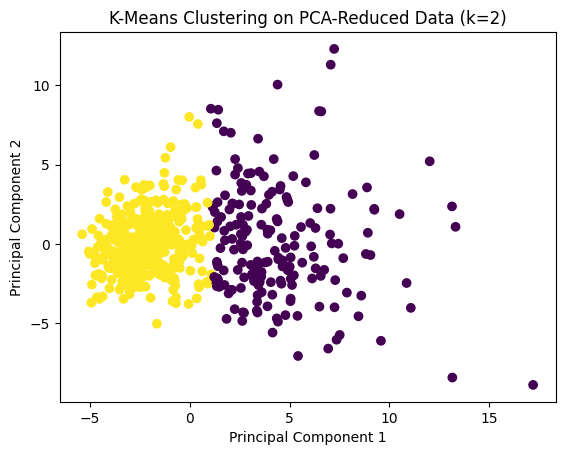

Silhouette Score for k=2: 0.50
Silhouette Score for k=2: 0.50
Silhouette Score for k=3: 0.49
Silhouette Score for k=4: 0.36
Silhouette Score for k=5: 0.35


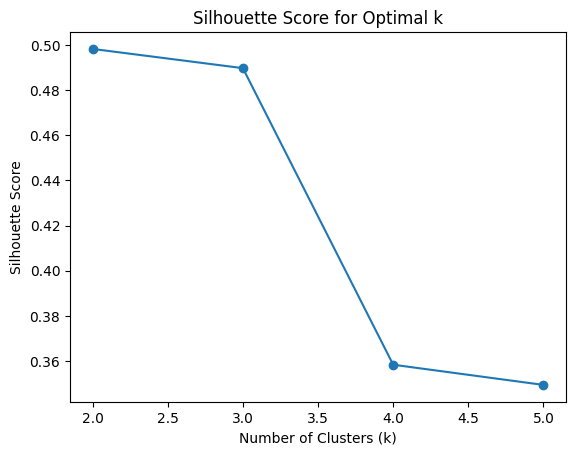

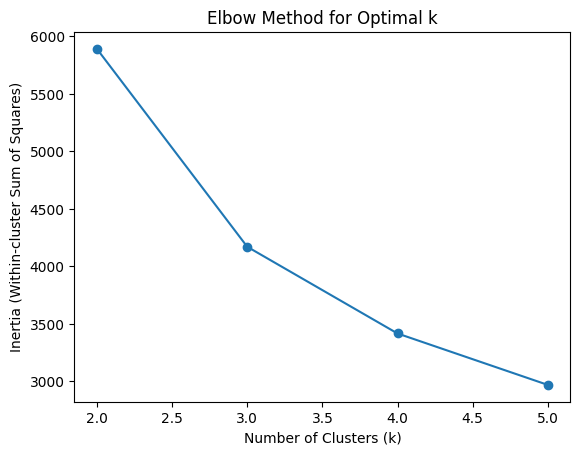

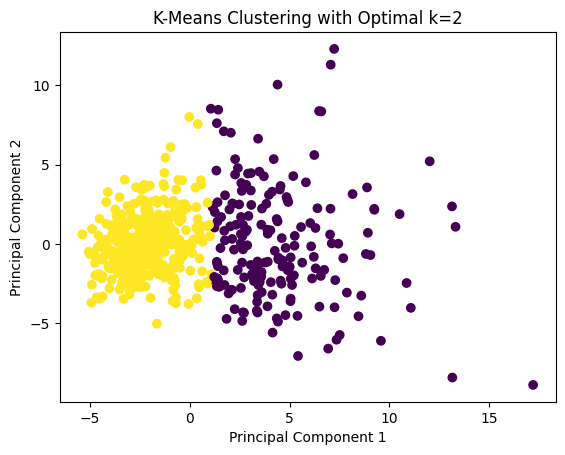

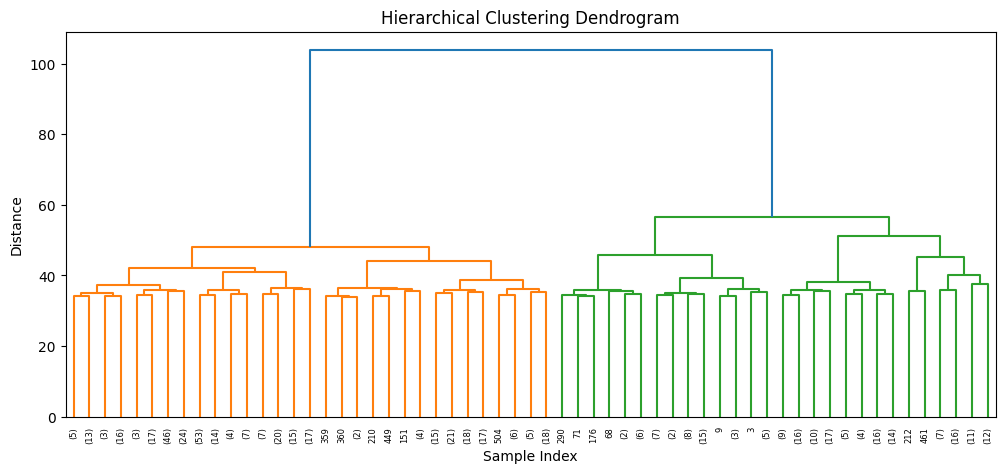

hierarchical_cluster  kmeans_cluster
1                     1                 375
0                     1                 133
2                     1                  53
0                     0                   5
                      2                   1
1                     0                   1
2                     0                   1
Name: count, dtype: int64


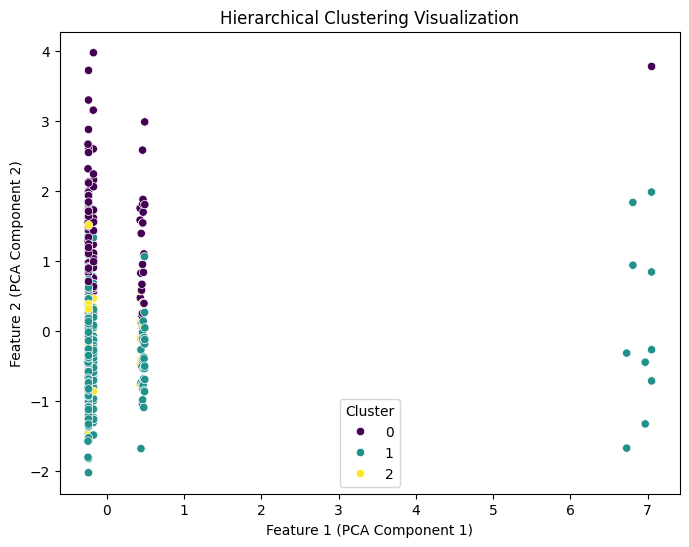

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer


# Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-in-Biotechnology-and-Life-Sciences/refs/heads/main/datasets/dataset_wisc_sd.csv'
data = pd.read_csv(url)

# Inspect dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())

# Separate features and target
y = data['diagnosis']  # Assuming 'diagnosis' column contains 'M' (Malignant) and 'B' (Benign)
X = data.drop(columns=['diagnosis'])  # Remove target column

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("\nNon-numeric columns:", non_numeric_cols)

# One-hot encode categorical features (if any)
if len(non_numeric_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_encoded = encoder.fit_transform(X[non_numeric_cols])
    X_numeric = X.select_dtypes(include=['number'])
    X_combined = np.hstack((X_numeric, X_encoded))
else:
    X_combined = X.values

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_combined)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means Clustering (Binary Classification)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data (k=2)')
plt.show()

# Evaluate clustering quality
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score for k=2: {silhouette_avg:.2f}')

# Find optimal k using Silhouette Score
silhouette_scores = []
for k in range(2, 6):
    kmeans_sub = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters_sub = kmeans_sub.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters_sub)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette Score for k={k}: {silhouette_avg:.2f}')

# Plot Silhouette Scores
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Find optimal k using Elbow Method
inertia = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 6), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Visualize best k
best_k = np.argmax(silhouette_scores) + 2  # Add 2 because range starts at 2
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
clusters_best = kmeans_best.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_best, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with Optimal k={best_k}')
plt.show()



# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Show only the last 5 levels for clarity
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Choose number of clusters based on dendrogram observation
num_clusters = 3  # Change based on dendrogram interpretation

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters_hierarchical = agg_cluster.fit_predict(X_scaled)

# Add clusters to the dataset for analysis
data['hierarchical_cluster'] = clusters_hierarchical

from sklearn.cluster import KMeans

# K-Means clustering for comparison
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add K-Means clusters to dataset
data['kmeans_cluster'] = clusters_kmeans

# Compare cluster distributions
print(data[['hierarchical_cluster', 'kmeans_cluster']].value_counts())



# visualize data
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters_hierarchical, palette='viridis')
plt.xlabel('Feature 1 (PCA Component 1)')
plt.ylabel('Feature 2 (PCA Component 2)')
plt.title('Hierarchical Clustering Visualization')
plt.legend(title='Cluster')
plt.show()


# github profile for team
# Ogunoye Blessing's Github page: https://github.com/to-ibukun
# Obakpolo Charis-Grace Github page: https://github.com/CeeGeeObas
# Funmilayo Ligali's Github page: https://github.com/Christianah001
# Fatemah Alsolaiman's Github page: https://github.com/92Faty